In [1]:
using CSV, DataFrames, StatsBase
using DelimitedFiles, Plots

In [2]:
PATHTODATASET = "/raid/javier/Datasets/DiffSolver"
d = readdir(PATHTODATASET * "/3SourcesRdm/")

4-element Vector{String}:
 "test"
 "test.csv"
 "train"
 "train.csv"

In [3]:
dirs = readdir(PATHTODATASET)
dirs = ["3SourcesRdm","4SourcesRdm","5SourcesRdm","6SourcesRdm","7SourcesRdm","8SourcesRdm","9SourcesRdm"]
dirs = ["3SourcesRdm"]

1-element Vector{String}:
 "3SourcesRdm"

In [4]:
for dir in dirs
    @show dir
    isdir(PATHTODATASET * "/$(dir)/test") || mkdir(PATHTODATASET * "/$(dir)/test")
    isdir(PATHTODATASET * "/$(dir)/train") || mkdir(PATHTODATASET * "/$(dir)/train")
    if size(readdir(PATHTODATASET * "/$(dir)/test"),1) == 0
        teIdx = sample(1:20000, 4000, replace = false)
        trIdx = setdiff(collect(1:20000), teIdx)
        for teId in teIdx
            mv(PATHTODATASET * "/$(dir)/Cell_$(teId).dat", PATHTODATASET * "/$(dir)/test/Cell_$(teId).dat", force=true)
            mv(PATHTODATASET * "/$(dir)/Field_$(teId).dat", PATHTODATASET * "/$(dir)/test/Field_$(teId).dat", force=true)
        end
        for trId in trIdx
            mv(PATHTODATASET * "/$(dir)/Cell_$(trId).dat", PATHTODATASET * "/$(dir)/train/Cell_$(trId).dat",force=true)
            mv(PATHTODATASET * "/$(dir)/Field_$(trId).dat", PATHTODATASET * "/$(dir)/train/Field_$(trId).dat",force=true)
        end
        CSV.write(PATHTODATASET * "/$(dir)/train.csv", DataFrame(Cell = ["Cell_$i.dat" for i in trIdx], Field = ["Field_$i.dat" for i in trIdx]))
        CSV.write(PATHTODATASET * "/$(dir)/test.csv", DataFrame(Cell = ["Cell_$i.dat" for i in teIdx], Field = ["Field_$i.dat" for i in teIdx]))
    end
end

dir = "3SourcesRdm"


In [ ]:
testAll = DataFrame()
trainAll = DataFrame()
for ds in ["$(i)SourcesRdm" for i in 1:20]
    testset = CSV.read(PATHTODATASET * "/$(ds)/" * "test.csv", DataFrame)
    trainset = CSV.read(PATHTODATASET * "/$(ds)/" * "train.csv", DataFrame);
    testset[!, "Prefix"] = [ds for i in 1:size(testset,1)]
    trainset[!, "Prefix"] = [ds for i in 1:size(trainset,1)]
    testAll = vcat(testAll, testset)
    trainAll = vcat(trainAll, trainset)
end

In [86]:
trainAll |> CSV.write(PATHTODATASET * "/train4:1.csv")
testAll |> CSV.write(PATHTODATASET * "/test4:1.csv")

"/raid/javier/Datasets/DiffSolver/test4:1.csv"

In [3]:
trainset = CSV.read(PATHTODATASET * "/train4:1.csv", DataFrame)
testset = CSV.read(PATHTODATASET * "/test4:1.csv", DataFrame);

In [ ]:
trainset = trainAll
testset = testAll;

In [15]:
# trainAll
trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[1:Int(size(trainset)[1]/40)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[1:Int(size(testset)[1]/40)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];


In [97]:
trainHalf |> CSV.write(PATHTODATASET * "/train2:1.csv")
testHalf |> CSV.write(PATHTODATASET * "/test2:1.csv")

"/raid/javier/Datasets/DiffSolver/test2:1.csv"

In [102]:
trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[1:Int(size(trainset)[1]/80)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[1:Int(size(testset)[1]/80)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];


In [103]:
trainHalf |> CSV.write(PATHTODATASET * "/train.csv")
testHalf |> CSV.write(PATHTODATASET * "/test.csv")

"/raid/javier/Datasets/DiffSolver/test.csv"

In [105]:
trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[1:Int(size(trainset)[1]/160)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[1:Int(size(testset)[1]/160)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];


In [106]:
trainHalf |> CSV.write(PATHTODATASET * "/trainHalf.csv")
testHalf |> CSV.write(PATHTODATASET * "/testHalf.csv")

"/raid/javier/Datasets/DiffSolver/testHalf.csv"

In [109]:
trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[1:Int(size(trainset)[1]/1600)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[1:Int(size(testset)[1]/1600)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];


In [110]:
trainHalf |> CSV.write(PATHTODATASET * "/trainSub.csv")
testHalf |> CSV.write(PATHTODATASET * "/testSub.csv")

"/raid/javier/Datasets/DiffSolver/testSub.csv"

In [5]:
trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[1:Int(size(trainset)[1]/800)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[1:Int(size(testset)[1]/800)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];


In [6]:
trainHalf |> CSV.write(PATHTODATASET * "/train1:10.csv")
testHalf |> CSV.write(PATHTODATASET * "/test1:10.csv")

"/raid/javier/Datasets/DiffSolver/test1:10.csv"

In [7]:
trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[1:Int(size(trainset)[1]/400)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[1:Int(size(testset)[1]/400)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];


In [8]:
trainHalf |> CSV.write(PATHTODATASET * "/train1:5.csv")
testHalf |> CSV.write(PATHTODATASET * "/test1:5.csv")

"/raid/javier/Datasets/DiffSolver/test1:5.csv"

In [16]:
# Int(size(testset,1)/400)
Int(size(trainset)[1]/1000)
# size(trainset,1) *0.02 /20

320

In [17]:
trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[1:Int(size(trainset)[1]/1000)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[1:Int(size(testset)[1]/1000)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];


In [18]:
trainHalf |> CSV.write(PATHTODATASET * "/trainSubNEW.csv")
testHalf |> CSV.write(PATHTODATASET * "/testSubNEW.csv")

"/raid/javier/Datasets/DiffSolver/testSubNEW.csv"

In [16]:
for i in 2:5
    trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[200*(i-1)+1:200*(i-1)+Int(size(trainset)[1]/1600)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
    testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[50*(i-1)+1:50*(i-1)+Int(size(testset)[1]/1600)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];
    trainHalf |> CSV.write(PATHTODATASET * "/trainSub-$(i).csv")
    testHalf |> CSV.write(PATHTODATASET * "/testSub-$(i).csv")
end


In [15]:
# trainHalf
# Int(size(trainset)[1]/1600)
# Int(size(testset)[1]/1600)

50

In [13]:
# findall(x->x == 1, trainset[:,3] .== "4SourcesRdm")[1:200]

In [8]:
for i in 2:5
    trainHalf = trainset[vcat([ findall(x->x == 1, trainset[:,3] .== ds)[800*(i-1)+1:800*(i-1)+Int(size(trainset)[1]/400)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:]
    testHalf = testset[vcat([ findall(x->x == 1, testset[:,3] .== ds)[200*(i-1)+1:200*(i-1)+Int(size(testset)[1]/400)] for ds in ["$(i)SourcesRdm" for i in 1:20]]...),:];
    trainHalf |> CSV.write(PATHTODATASET * "/train1:5-$(i).csv")
    testHalf |> CSV.write(PATHTODATASET * "/test1:5-$(i).csv")
end

In [9]:
dirs = readdir(PATHTODATASET)
dirs = ["3SourcesRdm","4SourcesRdm","5SourcesRdm","6SourcesRdm","7SourcesRdm","8SourcesRdm","9SourcesRdm"]
dirs = ["TwoSourcesRdm"]

1-element Vector{String}:
 "TwoSourcesRdm"

In [11]:
for dir in dirs
    @show dir
    isdir(PATHTODATASET * "/$(dir)/test") || mkdir(PATHTODATASET * "/$(dir)/test")
    isdir(PATHTODATASET * "/$(dir)/train") || mkdir(PATHTODATASET * "/$(dir)/train")
    if size(readdir(PATHTODATASET * "/$(dir)/test"),1) == 0
        teIdx = sample(1:20000, 4000, replace = false)
        trIdx = setdiff(collect(1:20000), teIdx)
        for teId in teIdx
            mv(PATHTODATASET * "/$(dir)/Cell_$(teId).dat", PATHTODATASET * "/$(dir)/test/Cell_$(teId).dat", force=true)
            mv(PATHTODATASET * "/$(dir)/Field_$(teId).dat", PATHTODATASET * "/$(dir)/test/Field_$(teId).dat", force=true)
        end
        for trId in trIdx
            mv(PATHTODATASET * "/$(dir)/Cell_$(trId).dat", PATHTODATASET * "/$(dir)/train/Cell_$(trId).dat",force=true)
            mv(PATHTODATASET * "/$(dir)/Field_$(trId).dat", PATHTODATASET * "/$(dir)/train/Field_$(trId).dat",force=true)
        end
        CSV.write(PATHTODATASET * "/$(dir)/train.csv", DataFrame(Cell = ["Cell_$i.dat" for i in trIdx], Field = ["Field_$i.dat" for i in trIdx]))
        CSV.write(PATHTODATASET * "/$(dir)/test.csv", DataFrame(Cell = ["Cell_$i.dat" for i in teIdx], Field = ["Field_$i.dat" for i in teIdx]))
    end
end

dir = "TwoSourcesRdm"


In [10]:
size(readdir(PATHTODATASET * "/TwoSourcesRdm"),1)

40000

In [ ]:
########################

In [5]:
testset = CSV.read(PATHTODATASET * "/3SourcesRdm/test.csv", DataFrame)
trainset = CSV.read(PATHTODATASET * "/3SourcesRdm/train.csv", DataFrame);

In [13]:
testset[1,1]
isdir(PATHTODATASET * "/3SourcesRdm-new/test") || mkdir(PATHTODATASET * "/3SourcesRdm-new/test")
# isdir(PATHTODATASET * "/3SourcesRdm-new/train") || mkdir(PATHTODATASET * "/3SourcesRdm-new/train")

"/raid/javier/Datasets/DiffSolver/3SourcesRdm-new/test"

In [14]:
for i in 1:size(testset,1)
    mv(PATHTODATASET * "/3SourcesRdm-new/$(testset[i,1])", PATHTODATASET * "/3SourcesRdm-new/test/$(testset[i,1])", force=true)
    mv(PATHTODATASET * "/3SourcesRdm-new/$(testset[i,2])", PATHTODATASET * "/3SourcesRdm-new/test/$(testset[i,2])", force=true)
end

In [15]:
for i in 1:size(trainset,1)
    mv(PATHTODATASET * "/3SourcesRdm-new/$(trainset[i,1])", PATHTODATASET * "/3SourcesRdm-new/train/$(trainset[i,1])", force=true)
    mv(PATHTODATASET * "/3SourcesRdm-new/$(trainset[i,2])", PATHTODATASET * "/3SourcesRdm-new/train/$(trainset[i,2])", force=true)
end
        


In [29]:
######################

In [50]:
@show sum(cell .^ 2)
@show sum(cell)
# sum(field .- cell)

sum(cell .^ 2) = 496.67254208160904
sum(cell) = 695.1852241920001


695.1852241920001

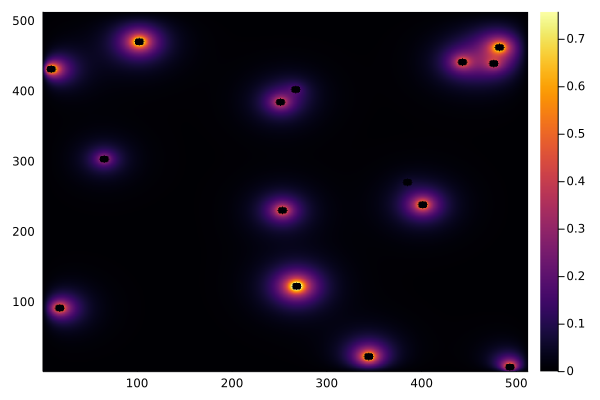

In [86]:
# heatmap(((1 .+ sign.(field .- cell)) ./ 2) .* field)
heatmap((1 .+ sign.(field .- sign.(cell)) ) ./ 2 .* field )
heatmap(field .- field .* sign.(cell))
# heatmap(field[1:40,480:500])
# heatmap(field)
# @show sum( ( ((1 .+ sign.(field .- cell)) ./ 2) .* field ) .^ 2 )
# @show sum( ( ((1 .+ sign.(field .- cell)) ./ 2) .* field ) )

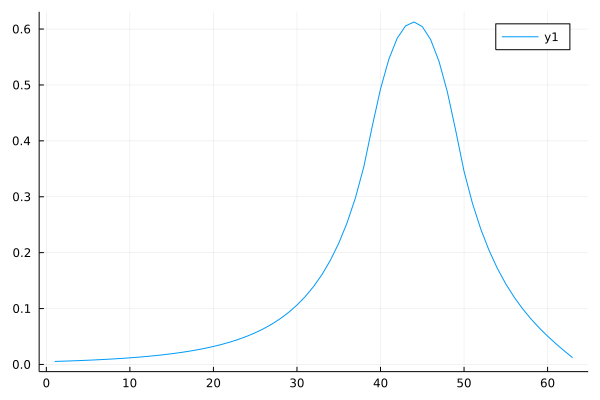

In [79]:
plot(field[7,450:512])

In [2]:
PATHTODATASET = "/home/javier/Projects/DiffSolver"
d = readdir(PATHTODATASET)

27-element Vector{String}:
 ".ipynb_checkpoints"
 "DataAnalysis.ipynb"
 "DeepDiffusionSolver"
 "DiffSolverOLD-TSR.ipynb"
 "DiffSolverOLD.ipynb"
 "Log"
 "Results"
 "__pycache__"
 "field.png"
 "fieldSamp.png"
 "input.png"
 "job.txt"
 "log.log"
 ⋮
 "ring1.png"
 "ring2.png"
 "ring3.png"
 "runSim.jl"
 "srcs.png"
 "tests.py"
 "trainModel-100.py"
 "trainModel.py"
 "trainSetStats.py"
 "x.txt"
 "y.txt"
 "yhat.txt"

In [10]:
cell = reshape(readdlm(PATHTODATASET * "/1SourcesRdm/train/Cell_3.dat"),512,512);
# field = reshape(readdlm(PATHTODATASET * "/y.txt"),512,512);
# fieldpred = reshape(readdlm(PATHTODATASET * "/yhat.txt"),512,512);

In [12]:
# heatmap(cell)
sum(cell)

81.0

In [17]:
savefig(heatmap(cell, size=(570,500)), PATHTODATASET * "/input.png")

In [18]:
savefig(heatmap(field, size=(570,500)), PATHTODATASET * "/field.png")

In [19]:
savefig(heatmap(fieldpred, size=(570,500)), PATHTODATASET * "/pred.png")

In [6]:
function plotfields(cell,field,fieldpred; b = 20, imax=3, n=10, sep=1)
    celltoBool = cell .> 0;
    l = findall(celltoBool)
    @show size(l)
    f1 = plot(legend=false)
    for i in n:sep:n+imax
        cc = maximum(cell[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)] )
        f1 = plot!(cell[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)]  , s=:solid)
        f1 = plot!(field[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)] , s=:dash)
        f1 = plot!(fieldpred[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)] , s=:solid)
    end
    f1 = plot!(frame=:box, lw=2, xlabel="relative pixel position", ylabel="pixel value")
    f2 = plot(legend=false)
    for i in n:sep:n+imax
        cc = maximum(cell[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)] )
        f2 = plot!(cell[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)] ./ (100*cc), s=:solid)
        f2 = plot!((fieldpred[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)] .- field[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)]), s=:solid)
#         plot!(fieldpred[l[i][1], max(l[i][2]-b,1):min(l[i][2]+b,512)] ./ cc, s=:solid)
    end
    f2 = plot!(frame=:box, lw=2, xlabel="relative pixel position", ylabel="prediction - target")
    plot(f1,f2)
end

plotfields (generic function with 1 method)

size(l) = (1539,)


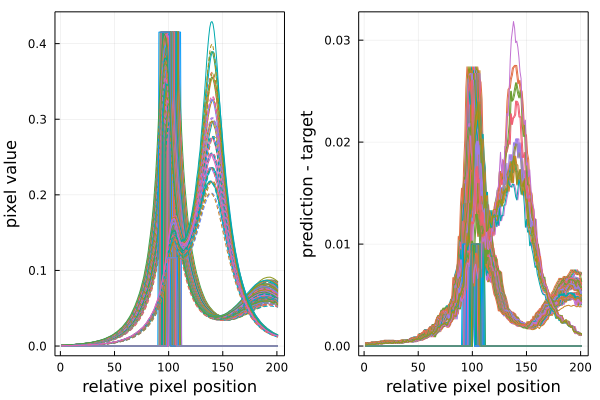

In [10]:
plotfields(cell,field,fieldpred, imax=100, n=1, b=100, sep=1)

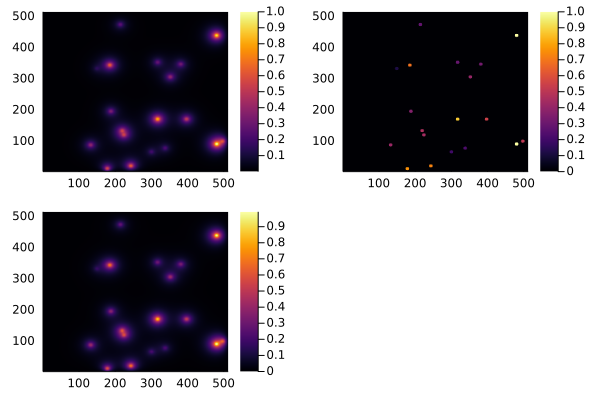

In [110]:
plot(heatmap(field), heatmap(cell),heatmap(fieldpred))

In [97]:
celltoBool = cell .> 0;
l = findall(celltoBool)
l[89:101]

13-element Vector{CartesianIndex{2}}:
 CartesianIndex(334, 145)
 CartesianIndex(327, 146)
 CartesianIndex(328, 146)
 CartesianIndex(329, 146)
 CartesianIndex(330, 146)
 CartesianIndex(331, 146)
 CartesianIndex(332, 146)
 CartesianIndex(333, 146)
 CartesianIndex(334, 146)
 CartesianIndex(335, 146)
 CartesianIndex(327, 147)
 CartesianIndex(328, 147)
 CartesianIndex(329, 147)

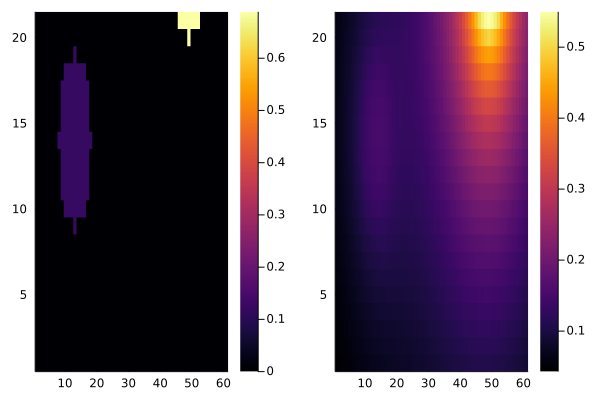

In [108]:
plot(heatmap(cell[l[100][1]-10:l[100][1]+10, l[100][2]-10:l[100][2]+50]),
heatmap(field[l[100][1]-10:l[100][1]+10, l[100][2]-10:l[100][2]+50]))

In [109]:
# [:auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
PATHTODATASET = "/raid/javier/Datasets/DiffSolver"
d = readdir(PATHTODATASET * "/3SourcesRdm/train/")

32000-element Vector{String}:
 "Cell_1.dat"
 "Cell_10.dat"
 "Cell_100.dat"
 "Cell_1000.dat"
 "Cell_10000.dat"
 "Cell_10001.dat"
 "Cell_10003.dat"
 "Cell_10004.dat"
 "Cell_10005.dat"
 "Cell_10008.dat"
 "Cell_10009.dat"
 "Cell_1001.dat"
 "Cell_10010.dat"
 ⋮
 "Field_9989.dat"
 "Field_999.dat"
 "Field_9990.dat"
 "Field_9991.dat"
 "Field_9992.dat"
 "Field_9993.dat"
 "Field_9994.dat"
 "Field_9995.dat"
 "Field_9996.dat"
 "Field_9997.dat"
 "Field_9998.dat"
 "Field_9999.dat"

In [127]:
number = 9942
cell = reshape(readdlm(PATHTODATASET * "/4SourcesRdm/test/Cell_$(number).dat"),512,512)
field = reshape(readdlm(PATHTODATASET * "/4SourcesRdm/test/Field_$(number).dat"),512,512);

In [28]:
heatmap(cell, frame=:box, ticks=false)

"/home/javier/Projects/DiffSolver"

In [35]:
# Sources
savefig(heatmap(sign.(cell), c=cgrad(:binary, rev=true), frame=:box, legend=false, ticks=false), PATHTODATASET * "/srcs.png")
# heatmap(cell)

In [30]:
# Field
savefig(heatmap(ones(size(cell)) .- sign.(cell), c=cgrad(:binary, rev=true), frame=:box, legend=false, ticks=false), PATHTODATASET * "/fieldSamp.png")


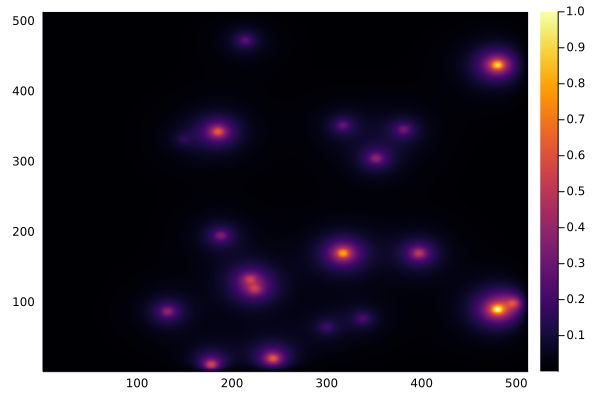

In [5]:
heatmap(field )

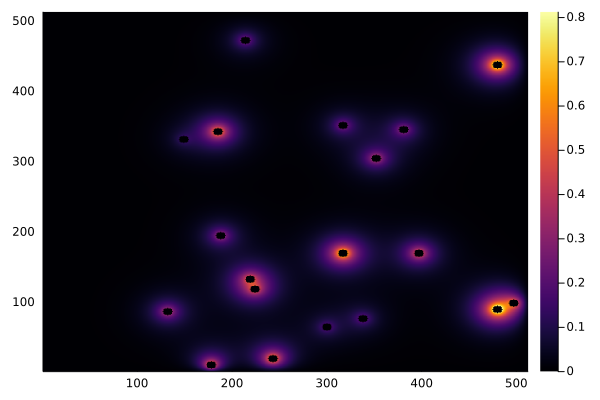

In [7]:
heatmap(field .- field .* sign.(cell))

In [31]:
savefig(heatmap(field .- field .* sign.(cell) .> 0.2, c=cgrad(:binary, rev=true), frame=:box, legend=false, ticks=false), PATHTODATASET * "/ring1.png")


In [33]:
savefig(heatmap((field .- field .* sign.(cell) .> 0.1) .* (field .- field .* sign.(cell) .< 0.2), c=cgrad(:binary, rev=true), frame=:box, legend=false, ticks=false), PATHTODATASET * "/ring2.png")


In [34]:
savefig(heatmap((field .- field .* sign.(cell) .> 0.05) .* (field .- field .* sign.(cell) .< 0.1), c=cgrad(:binary, rev=true), frame=:box, legend=false, ticks=false), PATHTODATASET * "/ring3.png")
# heatmap(field .- field .* sign.(cell) .> 0.2)

In [129]:
@show sum(sign.(cell))/4
243/3

sum(sign.(cell)) / 4 = 81.0


81.0

In [122]:
df = CSV.read(PATHTODATASET * "/3SourcesRdm/" * "train.csv", DataFrame)

,Cell,Field
,String15,String15
1,Cell_1.dat,Field_1.dat
2,Cell_2.dat,Field_2.dat
3,Cell_4.dat,Field_4.dat
4,Cell_6.dat,Field_6.dat
5,Cell_7.dat,Field_7.dat
6,Cell_8.dat,Field_8.dat
7,Cell_9.dat,Field_9.dat
8,Cell_10.dat,Field_10.dat
9,Cell_11.dat,Field_11.dat


In [123]:
df = CSV.read(PATHTODATASET * "/train4:1.csv", DataFrame)

,Cell,Field,Prefix
,String15,String15,String15
1,Cell_3.dat,Field_3.dat,1SourcesRdm
2,Cell_4.dat,Field_4.dat,1SourcesRdm
3,Cell_6.dat,Field_6.dat,1SourcesRdm
4,Cell_7.dat,Field_7.dat,1SourcesRdm
5,Cell_8.dat,Field_8.dat,1SourcesRdm
6,Cell_9.dat,Field_9.dat,1SourcesRdm
7,Cell_10.dat,Field_10.dat,1SourcesRdm
8,Cell_12.dat,Field_12.dat,1SourcesRdm
9,Cell_14.dat,Field_14.dat,1SourcesRdm


In [124]:
# size(df,1)/20
df[df[!,"Prefix"] .== "3SourcesRdm",:]

,Cell,Field,Prefix
,String15,String15,String15
1,Cell_1.dat,Field_1.dat,3SourcesRdm
2,Cell_2.dat,Field_2.dat,3SourcesRdm
3,Cell_4.dat,Field_4.dat,3SourcesRdm
4,Cell_6.dat,Field_6.dat,3SourcesRdm
5,Cell_7.dat,Field_7.dat,3SourcesRdm
6,Cell_8.dat,Field_8.dat,3SourcesRdm
7,Cell_9.dat,Field_9.dat,3SourcesRdm
8,Cell_10.dat,Field_10.dat,3SourcesRdm
9,Cell_11.dat,Field_11.dat,3SourcesRdm


In [3]:
using JSON

In [48]:
# d = JSON.parsefile(pwd() * "/Results/AfterPlots/stats_train.json")
d = JSON.parsefile(pwd() * "/Results/AfterPlots/stats_test.json")


Dict{String, Any} with 1 entry:
  "1DGX" => Dict{String, Any}("mean"=>Dict{String, Any}("ring1"=>Any[58851.7, 8…

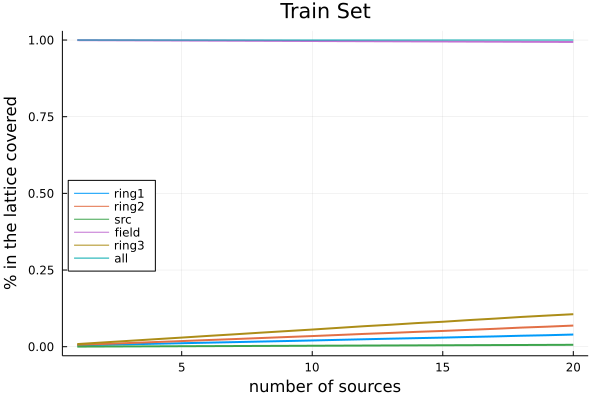

In [49]:
plot()
for key in keys(d["1DGX"]["mean"])
    if key ∈ ["src", "ring1","ring2","ring3", "field"]
        plot!(d["1DGX"]["mean"][key] ./ (512*512*50), label=key, lw=2)
    elseif key ∈ ["all"]
        plot!(d["1DGX"]["mean"][key] ./ (512*512), label=key)
    end
end
plot!(legend=(0.1,0.5), xlabel="number of sources", ylabel="% in the lattice covered", title="Train Set")

In [17]:
d["1DGX"]["mean"]["field"] ./ (512*512)

20-element Vector{Float64}:
 49.98455126285553
 49.96910905838013
 49.95367181301117
 49.938239705562594
 49.922803699970245
 49.907383346557616
 49.891966331005094
 49.876549899578094
 49.861140036582945
 49.845734441280364
 49.83032302856445
 49.81494890451431
 49.79954528808594
 49.7841423869133
 49.768796229362486
 49.753413951396944
 49.738037741184236
 49.72266815900802
 49.707298731803895
 49.6919804930687